# Black Hole Geodesics Plot v1

This research attempts to produce high-quality 3D plots of timelike geodesics using the Schwarzschild and Kerr metrics of General Relativity.

To begin with, let us first consider orbits in Newtonian gravity. Such orbits are given by:

$$
\frac{d^2r}{dt^2} = -\frac{GM}{r^2} + r \left(\frac{d\theta}{dt}\right)^2
$$

$$
\frac{d^2 \theta}{dt^2} = -\frac{2}{r} \frac{dr}{dt} \frac{d\theta}{dt}
$$

Which can be expanded into a system of four first-order ODEs:

$$
\frac{dr}{dt} = u
$$

$$
\frac{d\theta}{dt} = v
$$

$$
\frac{du}{dt} = -\frac{GM}{r^2} + rv^2
$$

$$
\frac{dv}{dt^2} = -\frac{2uv}{r}
$$

In [381]:
def newtonian_d_dt(t, X, G=6.67e-11, M=2e30):
    r, theta, u, v = X
    dr_dt = u
    dtheta_dt = v
    du_dt = -(G * M) / (r ** 2) + r * v ** 2
    dv_dt = -(2 * u * v) / r
    return dr_dt, dtheta_dt, du_dt, dv_dt

In [382]:
r0 = 1.5e11
theta0 = np.pi/2
u0 = 0
v0 = 1.99e-7 # 2pi / 365 days
newtonian_initial = [r0, theta0, u0, v0]

In [383]:
tmax = 365 * 24 * 60 * 60 # 1 year
samples = 5000
t = np.linspace(0, tmax, samples)
newtonian = solve_ivp(newtonian_d_dt, (0, tmax), y0=newtonian_initial, dense_output=True)
sol = newtonian.sol(t)

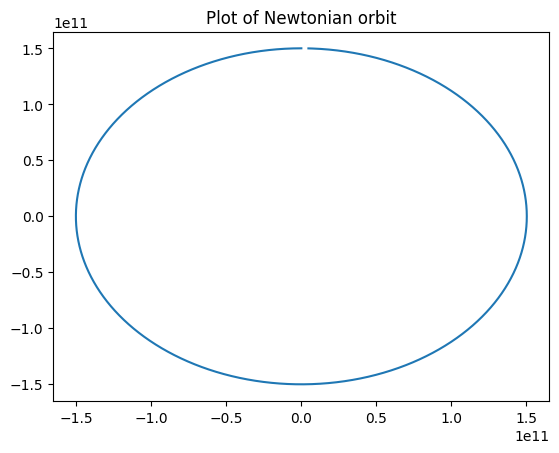

In [387]:
fig = plt.figure()
ax = plt.axes()

r = sol[0]
theta = sol[1]

# Convert from polar to cartesian
x1 = r * np.cos(theta)
y1 = r * np.sin(theta)

ax.plot(x1, y1)
ax.set_title('Plot of Newtonian orbit')
plt.show()

## Plotting Geodesics of the Schwarzschild Metric

The Schwarzschild metric in Schwarzschild coordinates is given by:

$$
ds^2 = -\left(1 - {\frac{2GM}{c^2 r}}\right) {dt}^2 + \left(\frac{1}{1 - {\frac{2GM}{c^2 r}}}\right) dr^2 + r^2 (d\theta^2 + \sin^2 (\theta) d\phi^2)
$$

Or, in terms of a quantity $r_s = \frac{2GM}{c^2}$:

$$
ds^2 = -\left(1 - {\frac{r_s}{r}}\right) {dt}^2 + \left(\frac{1}{1 - {\frac{r_s}{ r}}}\right) dr^2 + r^2 (d\theta^2 + \sin^2 (\theta) d\phi^2)
$$

The geodesics in Schwarzschild spacetime are given by:

$$
\frac{d^2 t}{d \tau^2} = -\frac{2 G M}{r(r-2 G M)}\frac{d t}{d \tau} \frac{d r}{d \tau}
$$

$$
\frac{d^2 r}{d \tau^2} = \frac{G M}{r(r-G M)}\left(\frac{d r}{d \tau}\right)^2-\frac{(r-2 G M) G M}{r^3}\left(\frac{d t}{d \tau}\right)^2-(2 G M-r)\left[\left(\frac{d \theta}{d \tau}\right)^2+\sin ^2 \theta\left(\frac{d \phi}{d \tau}\right)^2\right]
$$

$$
\frac{d^2 \theta}{d \tau^2}=\sin \theta \cos \theta\left(\frac{d \phi}{d \tau}\right)^2 - \frac{2}{r} \frac{d r}{d \tau} \frac{d \theta}{d \tau}
$$

$$
\frac{d^2 \phi}{d \tau^2}=-\frac{2}{r} \frac{d r}{d \tau} \frac{d \phi}{d \tau}-2 \cot \theta \frac{d \phi}{d \tau} \frac{d \theta}{d \tau}
$$

In EinsteinPy, such geodesics can be readily plotted similarly:

In [180]:
position = [40.0, np.pi / 2, 0.0]
momentum = [0.0, 0.0, 3.83405]

In [201]:
geod_sch = Timelike(
    metric="Schwarzschild",
    metric_params=(),
    position=position,
    momentum=momentum,
    steps=5500,
    delta=1.0,
    return_cartesian=True
)

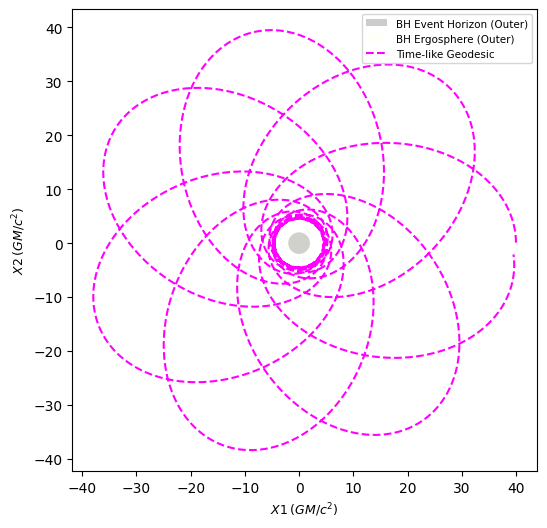

In [202]:
gpl = StaticGeodesicPlotter()
gpl.plot2D(geod_sch, color="magenta")
gpl.show()

Outside of EinsteinPy, the previously-given system of ODEs can be readily integrated as well. To do so, the original four equations of motion can be first expanded into a series of 8 first-order ODEs in preparation for numerical integration:

$$
\frac{dt}{d\tau} = u \quad 
\frac{dr}{d\tau} = v \quad
\frac{d\theta}{d\tau} = w \quad
\frac{d\phi}{d\tau} = \psi
$$

$$
\frac{du}{d\tau} = -\frac{2 G M}{r(r-2 G M)}uv
$$

$$
\frac{dv}{d\tau} = \frac{G M}{r(r-G M)}v^2-\frac{(r-2 G M) G M}{r^3}u^2-(2 G M-r)\left[w^2+\sin ^2 \theta \psi^2\right]
$$

$$
\frac{dw}{d \tau}=\sin \theta \cos \theta \psi^2 - \frac{2}{r} vw
$$

$$
\frac{d\psi}{d \tau}=-\frac{2}{r} v\psi -2 \cot \theta \psi w
$$

In [441]:
def sch_d_dt(t, X, G=6.67e-11, M=2e30):
    # Parameters for solar mass black hole
    # here dt is used as a shorthand for dtau
    t, r, theta, phi, u, v, w, psi = X
    dt_dt = u
    dr_dt = v
    dtheta_dt = w
    dphi_dt = psi
    du_dt = -(2 * G * M) / (r * (r - 2 * G * M)) * u * v
    dv_dt = ((G * M) / (r * (r - G * M)) * v ** 2) - (((r - 2 * G * M) * G * M)/(r ** 3)) * u ** 2 - (2 * G * M - r) * (w ** 2 + np.sin(theta) ** 2 * psi ** 2) 
    dw_dt = np.sin(theta) * np.cos(theta) * psi ** 2 - 2 / r * v * w
    dpsi_dt = -2 / r * v * psi - 2 * 1 / np.tan(theta) * psi * w
    return [dt_dt, dr_dt, dtheta_dt, dphi_dt, du_dt, dv_dt, dw_dt, dpsi_dt]

In [468]:
tau0 = 0
r0 = 2.88E+14
theta0 = np.pi / 2
phi0 = np.pi/3
u0 = 1 # dt/dt
v0 = 1.99e-7 # dr/dt 
w0 = 1.63e-09 # dtheta/dt
phi0 = 1.84e-7 # dphi/dt

sch_initial_pos = [tau0, r0, theta0, phi0, u0, v0, w0, phi0]

In [485]:
tmax = 500
samples = 5000
t = np.linspace(0, tmax, samples)
geodesic = solve_ivp(sch_d_dt, (0, tmax), y0=sch_initial_pos, dense_output=True)
sch_geodesic = geodesic.sol(t)

In [486]:
tau = sch_geodesic[0]
r = sch_geodesic[1]
theta = sch_geodesic[2]
phi = sch_geodesic[3]

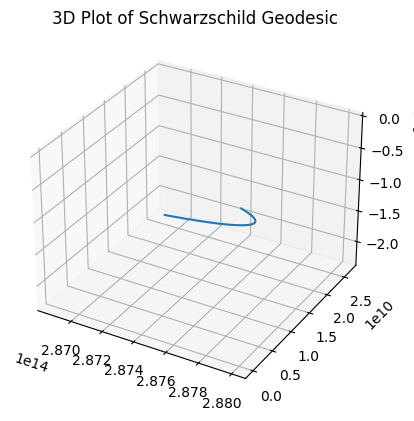

In [487]:
fig = plt.figure()
ax = plt.axes(projection='3d')

tau = sch_geodesic[0]
r = sch_geodesic[1]
theta = sch_geodesic[2]
phi = sch_geodesic[3]

# Convert from spherical to cartesian
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

ax.plot3D(x, y, z)
ax.set_title('3D Plot of Schwarzschild Geodesic')
plt.show()

It should be noted finally that an approximation to the geodesic equations is [[3]](https://www.reed.edu/physics/courses/Physics411/html/page2/files/Lecture.29.pdf):

$$
r=\frac{1}{A+B\cos\left(\phi\left(1-\delta\right)\right)}
$$

Which can be plotted similarly as shown before:

In [488]:
A = 1.8
B = 1.2
delta = 0.18

In [490]:
def geodesic_approx(phi):
    return 1 / (A + B * np.cos(phi * (1 - delta)))

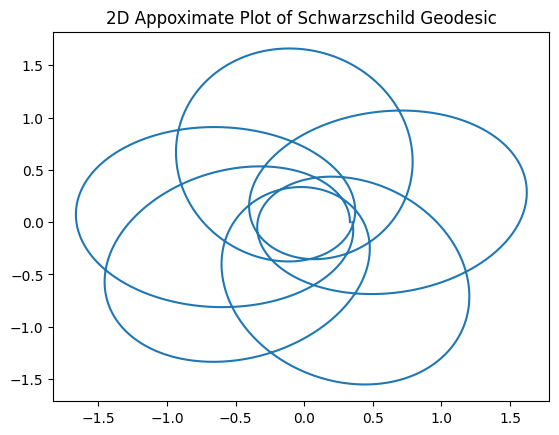

In [494]:
fig = plt.figure()
ax = plt.axes()

phi = np.linspace(0, 12 * np.pi, 5000)
r = geodesic_approx(phi)

# Convert from spherical to cartesian
x = r * np.cos(phi)
y = r * np.sin(phi)

ax.plot(x, y)
ax.set_title('2D Appoximate Plot of Schwarzschild Geodesic')
plt.show()

## Plotting Geodesics of the Kerr Metric

The Kerr metric (in units where $G = c = 1$) is given by:

$$
ds^2 = -\left(1 - \frac{2 M r}{\Sigma}\right) dt^2 + \frac{\Sigma}{\Delta} dr^2 + \Sigma d\theta^2 + \left(r^2 + a^2 + \frac{2 M r a^2}{\Sigma} \sin^2 \theta \right) \sin^2 \theta d\phi^2 - \frac{2 M r a sin^2 \theta}{\Sigma} dt d\phi
$$

Where the metric coefficients are given by [[2]](https://math.uchicago.edu/~may/REU2017/REUPapers/Hoang.pdf):

$$
g_{\mu\nu} = \pmatrix{
	-(1 - \frac{2 M r}{\Sigma}) & 0 & 0 & -\frac{2 M r a \sin^2 \theta}{\Sigma} \\
	0 & \frac{\Sigma}{\Delta} & 0 & 0 \\
	0 & 0 & \Sigma & 0 \\
	-\frac{2 M r a \sin^2 \theta}{\Sigma} & 0 & 0 & \left(r^2 + a^2 + \frac{2 M r a^2}{\Sigma} \sin^2 \theta \right) \sin^2 \theta
}
$$

And $\Sigma$ and $\Delta$ are respectively given by:

$$
\Sigma = r^2 + a^2 cos^2 \theta
$$

$$
\Delta = r^2 - 2 M r + a^2
$$

Geodesics in Kerr spacetime are given by [[3]](https://arxiv.org/pdf/gr-qc/0202090.pdf):

$$
\frac{dt}{d\tau} =\frac{1}{\mu \Sigma}\left[\frac{r^2+a^2}{\Delta} (E(r^2 + a^2) - aL)-a\left(a E \sin ^2 \theta-L\right)\right]
$$

$$
\frac{dr}{d\tau} = \frac{1}{\mu\Sigma} \left[\left(r^2+a^2\right) E-a L\right]^2-\Delta\left[\mu^2 r^2+\left(L-a E\right)^2+Q\right]^{1/2}
$$

$$
\frac{d\theta}{d\tau} = \frac{1}{\mu \Sigma} \left[Q-\left[\left(\mu^2-E^2\right) a^2+\frac{L_z^2}{\sin ^2 \theta}\right] \cos ^2 \theta\right]^{1/2}
$$

$$
\frac{d\phi}{d\tau} = \frac{a}{\Delta} (E(r^2 + a^2) - aL)-a E+\frac{L}{\sin ^2 \theta}
$$

Where $Q$ is Carter's constant, defined by:

$$
Q=p_{\theta }^{2}+\cos ^{2}\theta {\Bigg (}a^{2}(m^{2}-E^{2})+\left({\frac {L_{z}}{\sin \theta }}\right)^{2}{\Bigg )}
$$

TODO: verify whether to use that set of geodesic equations or this set:

$$
\begin{aligned}
\dot{t} & =E+\frac{2 r\left(r^2+a^2\right) E-2 a L}{\Sigma \Delta} \\
\dot{r}^2 & =\frac{\Delta}{\Sigma}\left(H+E \dot{t}-L \dot{\phi}-\Sigma \dot{\theta}^2\right) \\
\dot{\theta}^2 & =\frac{1}{\Sigma^2}\left(Q+\left(E^2+H\right) a^2 \cos ^2 \theta-L^2 \cot ^2 \theta\right) \\
\dot{\phi} & =\frac{2 a r E+(\Sigma-2 r) L / \sin ^2 \theta}{\Sigma \Delta}
\end{aligned}
$$

In EinsteinPy, Kerr geodesics can be plotted as follows:

In [117]:
import numpy as np

from einsteinpy.geodesic import Timelike
from einsteinpy.plotting import StaticGeodesicPlotter

In [118]:
# Constant Radius Orbit
position = [4, np.pi / 3, 0.]
momentum = [0., 0.767851, 2.]
a = 0.99
steps = 400.
delta = 0.5

In [119]:
geod_kerr = Timelike(
    metric="Kerr",
    metric_params=(a,),
    position=position,
    momentum=momentum,
    steps=steps,
    delta=delta,
    return_cartesian=True
)

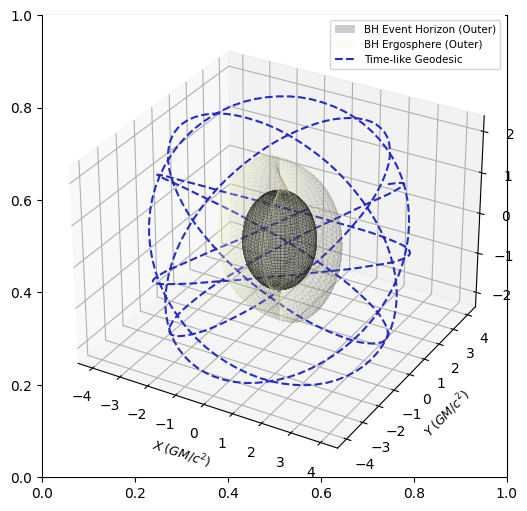

In [219]:
gpl2 = StaticGeodesicPlotter()
gpl2.plot(geod_kerr)
gpl2.show()